In [2]:
# импорт модулей
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Самый знаменитый датасет от Титаника

Каждая строчка наборов данных содержит следующие поля:

- Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

- Name — имя;

- Sex — пол;

- Age — возраст;

- SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

- Parch — количество родителей, детей (в том числе приемных) на борту титаника;

- Ticket — номер билета;

- Fare — плата за проезд;

- Cabin — каюта;

- Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон;

- Survived - пассажир выжил или нет.

В поле Age приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2023/seminars/sem03_pandas/titanic_train.csv", sep=",")

In [4]:
# типы данных
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# сравним сколько место занимает столбец
df["SibSp"].astype("int64").memory_usage()

7256

In [6]:
df["SibSp"].astype("int8").memory_usage()

1019

In [7]:
# характеристики датасета
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.mean()

C:\Temp/ipykernel_6960/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [13]:
df.median()

C:\Temp/ipykernel_6960/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [18]:
df.apply(pd.Series.value_counts).idxmax()

PassengerId                      1
Survived                         0
Pclass                           3
Name           Abbing, Mr. Anthony
Sex                           male
Age                             24
SibSp                            0
Parch                            0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
dtype: object

In [19]:
# корреляция между столбцами
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [24]:
# на просмотр может быть выведен только один стобец
Y = df["Survived"]
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [25]:
type(Y)

pandas.core.series.Series

In [26]:
df[["Survived", "Age"]].head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [27]:
type(df[["Survived", "Age"]])

pandas.core.frame.DataFrame

In [29]:
df.drop(1, axis=0) #inplace=True

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:
data = df

In [33]:
data is df

True

In [30]:
# удаление данных одного из столбцов
X = df[df.columns.drop("Survived")]

In [31]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [34]:
X = df.drop("Survived", axis=1)  # same thing as previous cell

In [35]:
X.shape, df.shape

((891, 11), (891, 12))

In [36]:
# выделение части строк
X.loc[[5, 8, 10]]  # selected by index; select rows

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [37]:
# изменение индексации
df.set_index("Name").head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### Анализ данных

In [39]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
set(df["Sex"])

{'female', 'male'}

In [41]:
df["Sex"].nunique

<bound method IndexOpsMixin.nunique of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object>

In [42]:
len(set(df["Name"]))

891

In [43]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [46]:
df.pivot_table("PassengerId", "Sex", "Survived", "count")

Survived,0,1
Sex,,
female,81,233
male,468,109


<Axes: xlabel='Sex'>

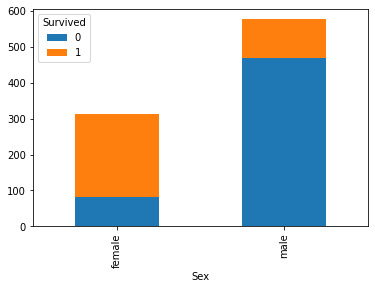

In [49]:
df.pivot_table("PassengerId", "Sex", "Survived", "count").plot(kind="bar", stacked=True)
# Вывод из полученных гистограмм?

<Axes: xlabel='Pclass'>

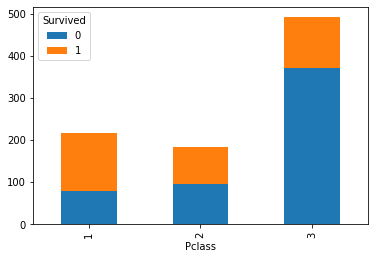

In [51]:
df.pivot_table("PassengerId", "Pclass", "Survived", "count").plot(kind="bar", stacked=True)
# Вывод из полученных гистограмм?

In [82]:
df_filtered = df[df['SibSp'] > 1]

In [83]:
df_filtered.shape

(74, 13)

In [84]:
df_filtered = df_filtered[df_filtered['Parch'] > 1]

In [85]:
df_filtered.shape

(33, 13)

<Axes: title={'center': 'Parch'}, xlabel='Parch'>

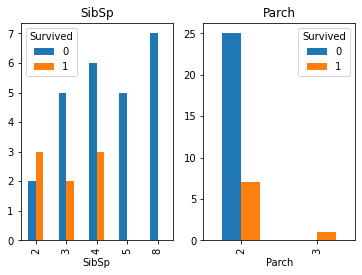

In [86]:
fig, axes = plt.subplots(ncols=2)
df_filtered.pivot_table("PassengerId", ["SibSp"], "Survived", "count").plot(
    ax=axes[0], title="SibSp", kind="bar"
)
df_filtered.pivot_table("PassengerId", ["Parch"], "Survived", "count").plot(
    ax=axes[1], title="Parch", kind="bar"
)

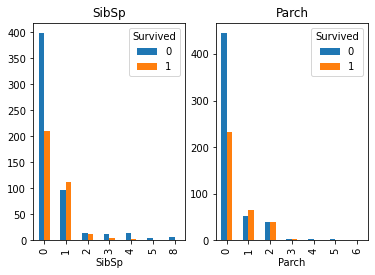

In [55]:
fig, axes = plt.subplots(ncols=2)
df.pivot_table("PassengerId", ["SibSp"], "Survived", "count").plot(
    ax=axes[0], title="SibSp", kind="bar"
)
df.pivot_table("PassengerId", ["Parch"], "Survived", "count").plot(
    ax=axes[1], title="Parch", kind="bar"
)
plt.draw()
# Вывод?

<Axes: xlabel='PassengerId'>

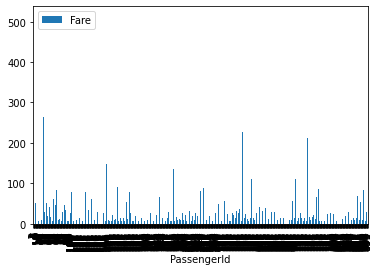

In [56]:
# df.plot(x="PassengerId", y="Fare", kind="bar") -- не стоит строить

### Обработка и преобразование данных

In [57]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
# преобразуем текстовый признак "Пол" в числовые значения
df["DecodedSex"] = df["Sex"].map({"male": 1, "female": -1, "unknown": 0})
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DecodedSex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,-1


In [ ]:
# добавим еще одну характеристику для каждого объекта датасета
def fun(age):
    return age / 100

def fun2(x):
    return x * 2

df["NewAge"] = df["Age"].apply(fun)
print(df.head(2))
print(df.apply(fun2))

In [ ]:
# то же самое можно сделать с помощью лямбда функции
df["NewAge"] = df["Age"].apply(lambda age: age / 100)

In [ ]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DecodedSex,NewAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S,1,0.22
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,-1,0.26


In [64]:
# выделим фамилию из данных
df["Surname"] = df["Name"].apply(lambda name: name.split(",")[0])  # option 1

In [ ]:
df["Surname"] = df["Name"].apply(lambda name: name[: name.find(";")])  # option 2

In [65]:
df["Surname"].value_counts().head()

Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
Name: Surname, dtype: int64

In [66]:
type(df.values)

numpy.ndarray

In [68]:
df.values  # df -> numpy.array

array([[1, 0, 3, ..., nan, 'S', 'Braund'],
       [2, 1, 1, ..., 'C85', 'C', 'Cumings'],
       [3, 1, 3, ..., nan, 'S', 'Heikkinen'],
       ...,
       [889, 0, 3, ..., nan, 'S', 'Johnston'],
       [890, 1, 1, ..., 'C148', 'C', 'Behr'],
       [891, 0, 3, ..., nan, 'Q', 'Dooley']], dtype=object)

In [70]:
# Исследуем возраст пассажиров Титаника
df.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [71]:
df.groupby("Sex")["Age"].apply(np.mean)

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [72]:
df.groupby("Sex")["Age"].apply(lambda ages: np.mean(ages) ** 2)

Sex
female    779.286798
male      944.126688
Name: Age, dtype: float64

In [73]:
df.groupby("Survived")["Age"].apply(np.mean)

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [ ]:
dir(df.groupby(["Sex", "Pclass"]))

In [ ]:
# группировка по нескольким столбцам и агрегация нескольких полей сразу
df.groupby(["Sex", "Pclass"]).agg(avg=("Age", "mean"), avg_surv=("Survived", "mean"))

avg  avg_supv
Sex    Pclass                     
female 1       34.611765  0.968085
       2       28.722973  0.921053
       3       21.750000  0.500000
male   1       41.281386  0.368852
       2       30.740707  0.157407
       3       26.507589  0.135447

In [77]:
# .mean -> .count
# Сколько семей больше трех человек?
np.sum(df.groupby("Surname")["Name"].count() > 3)

22

In [79]:
# Сколько семей, в которых минимальный возраст меньше 10 лет?
np.sum(df.groupby("Surname")["Age"].apply(min) < 10)

39

In [81]:
# можно выделять объекты с помощью масок
# cоздание маски
np.sum((df["Age"] > 20) & (df["Age"] < 30))

205

In [ ]:
# пассажиры, удовлетворяющие условию
df.loc[(df["Age"] > 10) & (df["Age"] < 20)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DecodedSex,NewAge,Surname
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,-1,0.14,"Nasser, Mrs. Nicholas (Adele Achem"
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,-1,0.14,"Vestrom, Miss. Hulda Amanda Adolfin"
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,-1,0.15,"McGowan, Miss. Anna ""Annie"
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,1,0.19,"Fortune, Mr. Charles Alexande"
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S,-1,0.18,"Vander Planke, Miss. Augusta Mari"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S,-1,0.16,"Lines, Miss. Mary Conove"
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,-1,0.18,"Aks, Mrs. Sam (Leah Rosen"
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,-1,0.15,"Najib, Miss. Adele Kiamie ""Jane"
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S,1,0.19,"Petroff, Mr. Nedeli"


### Доп материалы


[Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

[10 Minutes To Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)

[Pandas CookBook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)